In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures


In [2]:
Originall_df=pd.read_csv('StudentPerformanceFactors.csv')
Originall_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Data cleaning


In [3]:
Originall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
object_cols = Originall_df.select_dtypes(include='object').columns
Originall_df[object_cols] = Originall_df[object_cols].astype('category')

Originall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [5]:
Originall_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
Originall_df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [7]:
Originall_df.dropna(inplace=True) # Removing nulls

In [8]:
Originall_df.shape[0]

6378

In [9]:
Originall_df.duplicated().sum()

np.int64(0)

#### exploring data values and errors

In [10]:
Originall_df['Access_to_Resources'].unique()

['High', 'Medium', 'Low']
Categories (3, object): ['High', 'Low', 'Medium']

In [11]:
Originall_df['Access_to_Resources'].value_counts()

Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64

In [12]:
Originall_df['Attendance'].unique()

array([ 84,  64,  98,  89,  92,  88,  78,  94,  80,  97,  83,  82,  68,
        60,  70,  75,  99,  74,  65,  62,  91,  90,  66,  69,  72,  63,
        61,  86,  77,  71,  67,  87,  73,  96, 100,  81,  95,  79,  85,
        76,  93])

In [13]:
Originall_df['Attendance'].value_counts()

Attendance
67     182
76     179
98     178
77     177
64     176
94     175
91     169
84     169
79     169
69     166
68     166
82     165
96     164
80     163
93     163
73     162
81     161
72     160
95     160
74     159
78     158
89     157
61     155
63     153
88     153
97     153
83     152
65     152
90     151
92     150
99     150
71     150
86     149
70     148
87     148
62     146
75     144
85     142
66     140
60      85
100     79
Name: count, dtype: int64

In [14]:
Originall_df['Distance_from_Home'].unique()

['Near', 'Moderate', 'Far']
Categories (3, object): ['Far', 'Moderate', 'Near']

In [15]:
Originall_df['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3801
Moderate    1941
Far          636
Name: count, dtype: int64

In [16]:
Originall_df['Exam_Score'].unique()

array([ 67,  61,  74,  71,  70,  66,  69,  72,  68,  65,  64,  60,  63,
        62, 100,  76,  79,  73,  78,  89,  75,  59,  86,  97,  83,  84,
        80,  58,  94,  55,  92,  82,  77, 101,  88,  91,  99,  87,  57,
        96,  98,  95,  85,  93,  56])

In [17]:
Originall_df['Exam_Score'].value_counts()

Exam_Score
68     738
66     722
67     692
65     650
69     599
70     526
64     478
71     398
63     350
72     298
62     261
61     166
73     133
74     102
60      75
75      48
59      39
58      21
76      16
80       5
77       5
94       4
86       4
82       4
78       4
57       4
84       3
79       3
89       3
98       3
88       3
97       3
95       2
93       2
87       2
99       2
92       2
83       1
100      1
55       1
101      1
91       1
96       1
85       1
56       1
Name: count, dtype: int64

In [18]:
Originall_df['Extracurricular_Activities'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [19]:
Originall_df['Extracurricular_Activities'].value_counts()

Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64

In [20]:
Originall_df['Family_Income'].unique()

['Low', 'Medium', 'High']
Categories (3, object): ['High', 'Low', 'Medium']

In [21]:
Originall_df['Family_Income'].value_counts()

Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64

In [22]:
Originall_df['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [23]:
Originall_df['Gender'].value_counts()

Gender
Male      3688
Female    2690
Name: count, dtype: int64

In [24]:
#Originall_df[Originall_df['Gender']=='Male' & Originall_df['Exam_Score'] > 70]

In [25]:
Originall_df['Hours_Studied'].unique()

array([23, 19, 24, 29, 25, 17, 21,  9, 10, 14, 22, 15, 12, 20, 11, 13, 16,
       18, 31,  8, 26, 28,  4, 35, 27, 33, 36, 43, 34,  1, 30,  7, 32,  6,
       38,  5,  3, 39,  2, 37, 44])

In [26]:
Originall_df['Hours_Studied'].value_counts()

Hours_Studied
20    448
19    425
21    420
18    393
23    389
22    386
17    370
24    343
16    337
15    303
25    281
14    257
26    255
27    217
13    213
12    189
28    169
11    140
29    131
30    119
10     91
9      79
31     75
8      55
32     54
7      51
33     37
34     27
5      21
35     20
6      17
4      16
3      12
36     10
38      7
39      6
37      6
2       4
1       3
43      1
44      1
Name: count, dtype: int64

In [27]:
Originall_df['Internet_Access'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [28]:
Originall_df['Internet_Access'].value_counts()

Internet_Access
Yes    5893
No      485
Name: count, dtype: int64

In [29]:
Originall_df['Learning_Disabilities'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [30]:
Originall_df['Learning_Disabilities'].value_counts()

Learning_Disabilities
No     5710
Yes     668
Name: count, dtype: int64

In [31]:
Originall_df['Motivation_Level'].value_counts()

Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64

In [32]:
Originall_df['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3159
College         1939
Postgraduate    1280
Name: count, dtype: int64

In [33]:
Originall_df['Parental_Involvement'].value_counts()

Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64

In [34]:
Originall_df['Peer_Influence'].value_counts()

Peer_Influence
Positive    2553
Neutral     2495
Negative    1330
Name: count, dtype: int64

In [35]:
Originall_df['Physical_Activity'].value_counts()

Physical_Activity
3    2460
2    1562
4    1535
1     400
5     346
0      44
6      31
Name: count, dtype: int64

In [36]:
Originall_df['Previous_Scores'].value_counts()

Previous_Scores
66     160
94     148
96     145
85     145
59     140
71     140
82     139
53     138
88     136
70     134
73     134
76     133
86     133
65     133
52     132
80     131
91     129
98     129
68     129
67     129
64     129
74     129
63     128
89     127
54     127
92     124
78     124
95     123
93     123
57     123
75     123
79     122
51     122
69     121
99     121
62     121
87     120
55     120
84     119
61     119
60     119
81     119
90     118
77     117
83     117
72     117
58     117
56     114
97     111
100     68
50      59
Name: count, dtype: int64

In [37]:
Originall_df['School_Type'].value_counts()

School_Type
Public     4434
Private    1944
Name: count, dtype: int64

In [38]:
Originall_df['Sleep_Hours'].value_counts()

Sleep_Hours
7     1682
8     1354
6     1322
9      753
5      668
10     303
4      296
Name: count, dtype: int64

In [39]:
Originall_df['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64

In [40]:
Originall_df['Tutoring_Sessions'].value_counts()

Tutoring_Sessions
1    2111
2    1586
0    1458
3     800
4     296
5     101
6      18
7       7
8       1
Name: count, dtype: int64

# EDA

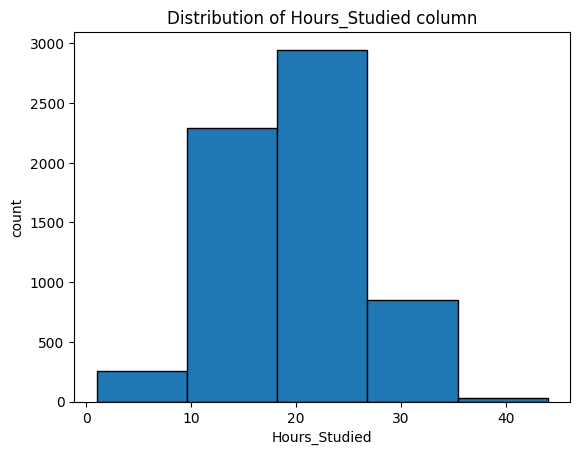

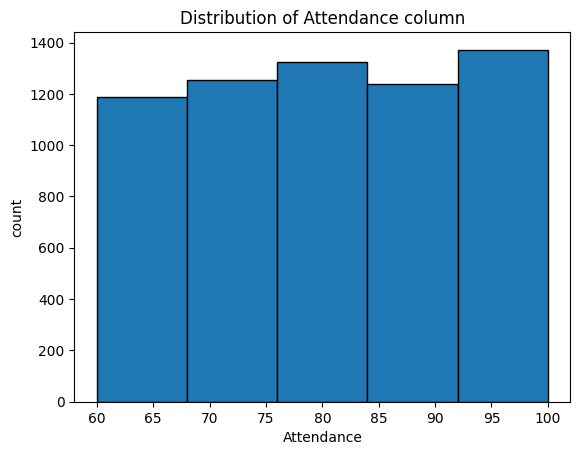

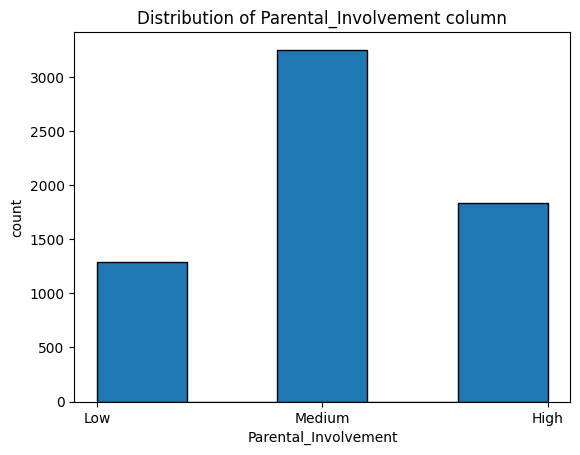

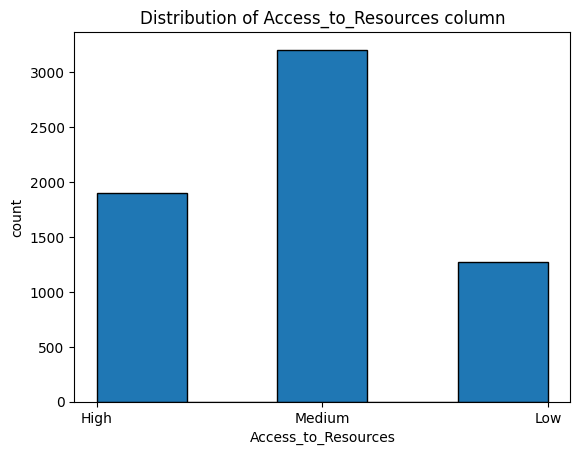

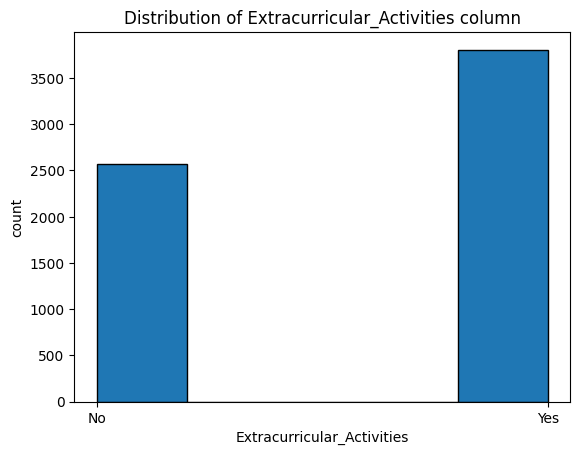

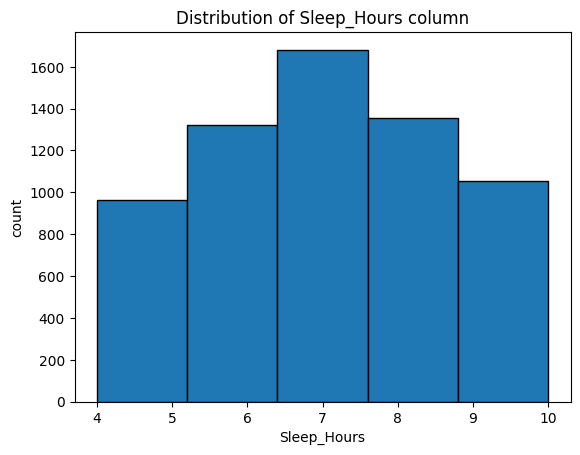

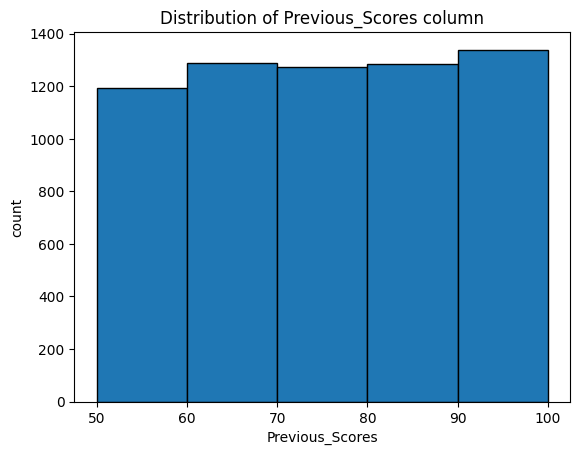

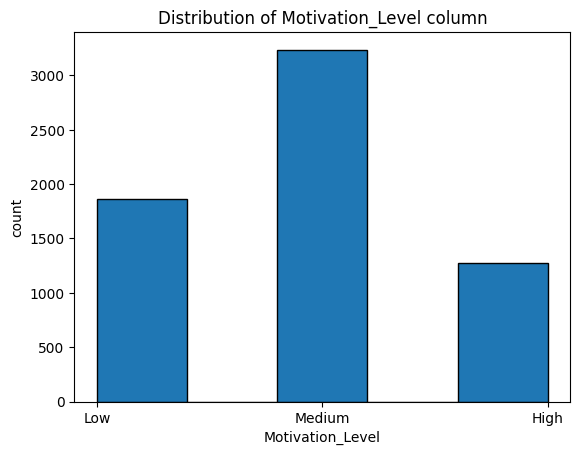

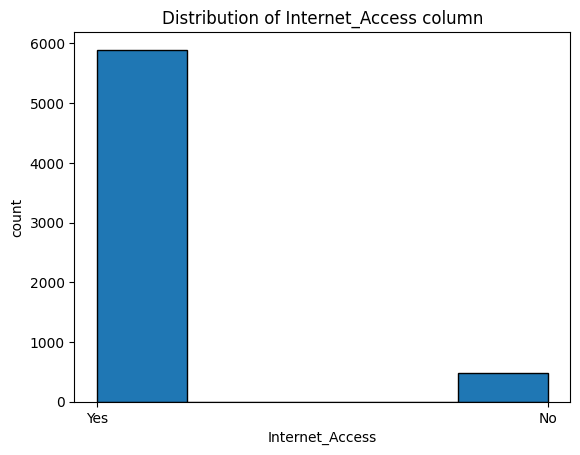

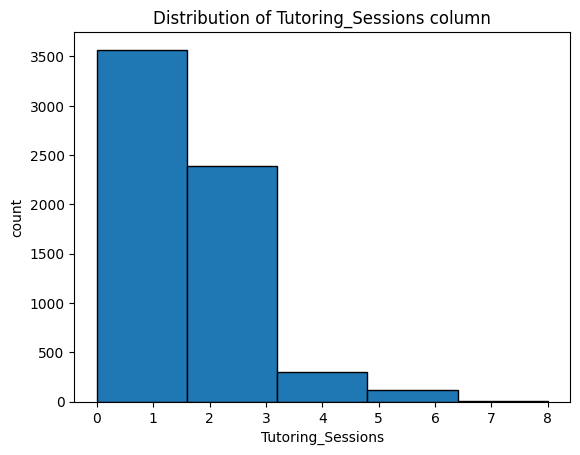

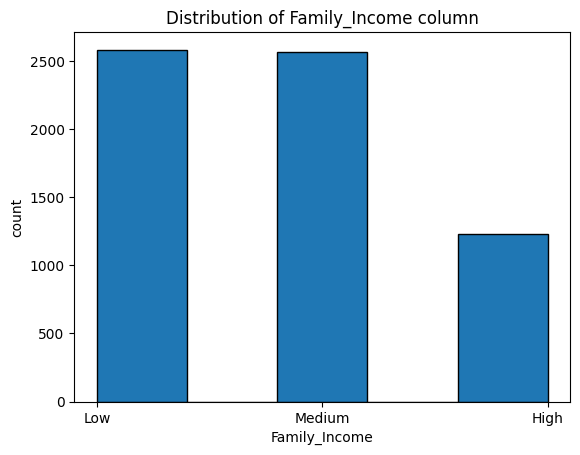

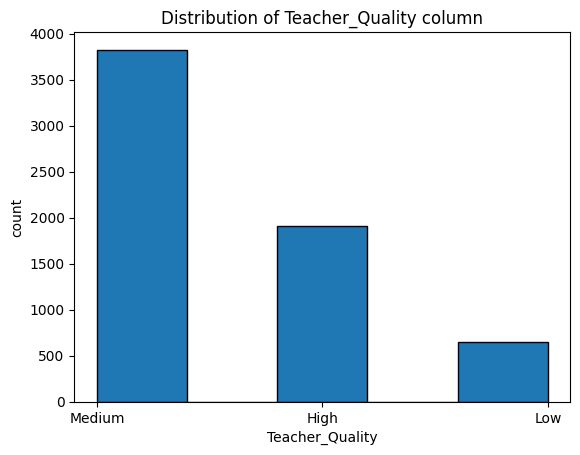

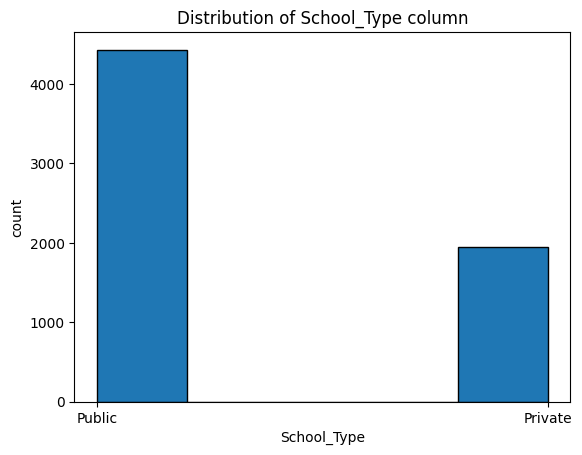

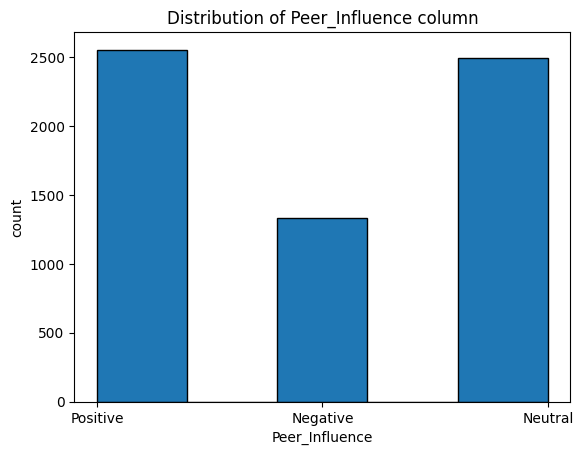

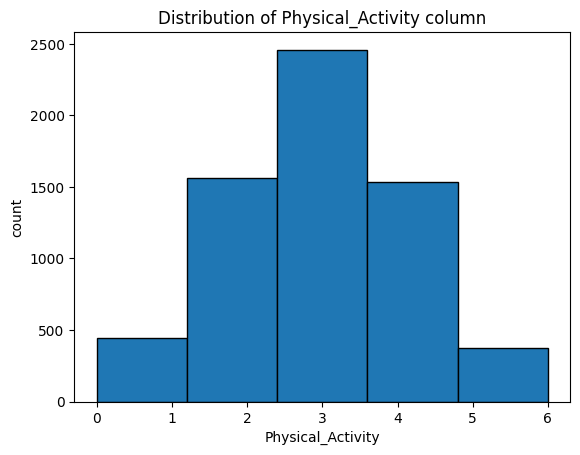

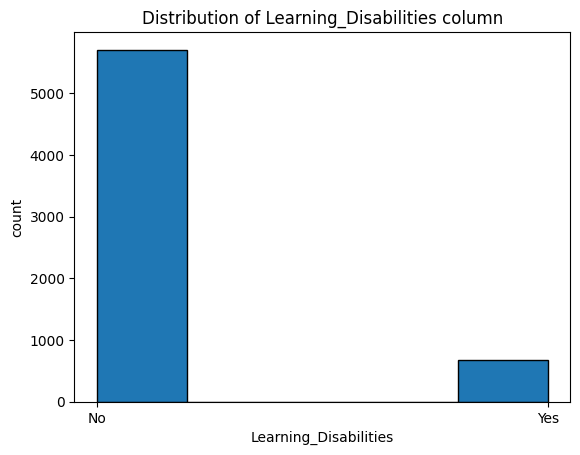

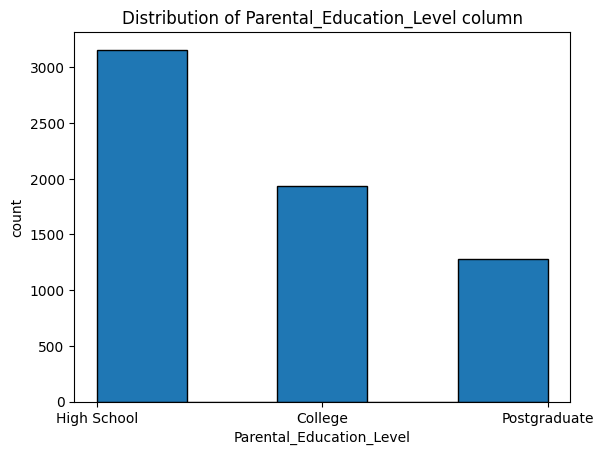

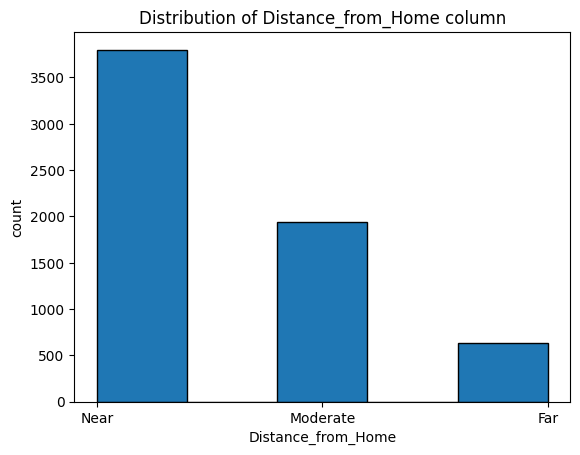

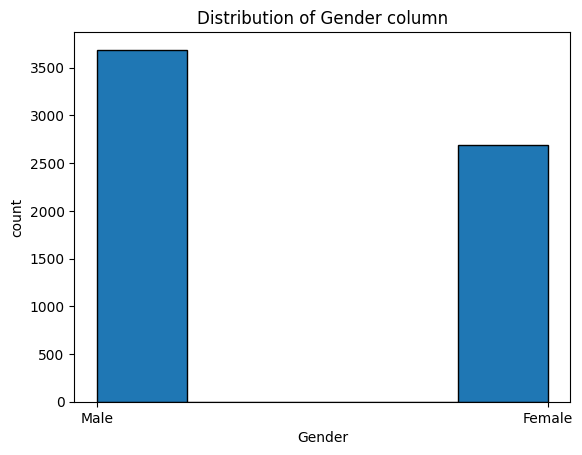

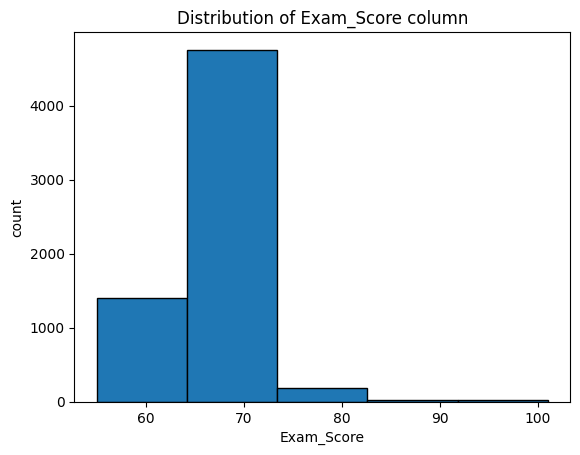

In [41]:
for column in Originall_df:
    plt.hist(Originall_df[column],bins=5,edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('count')
    plt.title(f'Distribution of {column} column')
    plt.show()
    

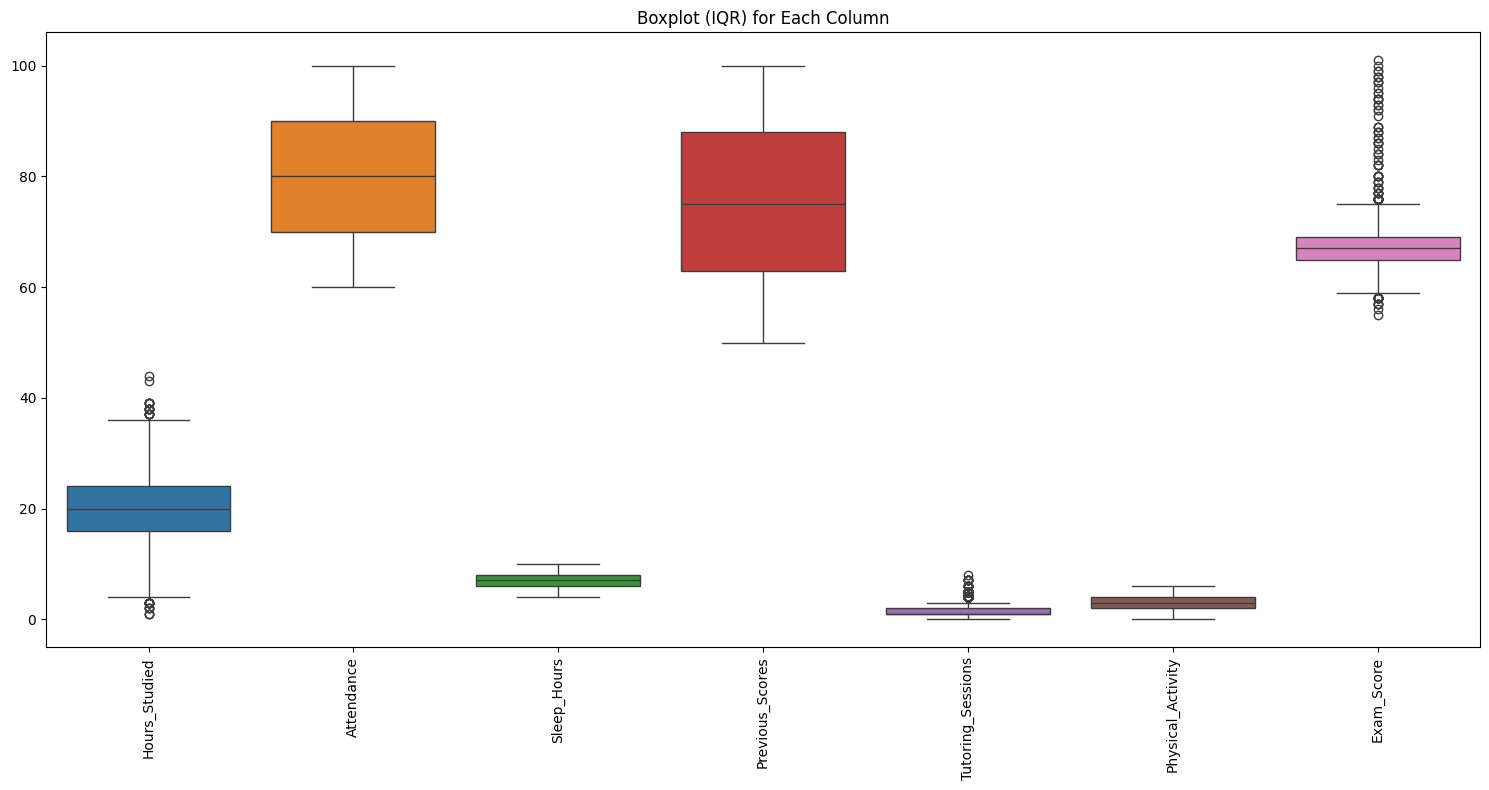

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=Originall_df)
plt.xticks(rotation=90)
plt.title('Boxplot (IQR) for Each Column')
plt.tight_layout()
plt.show()


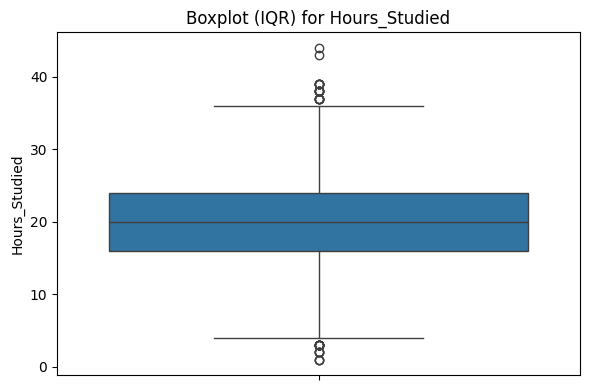

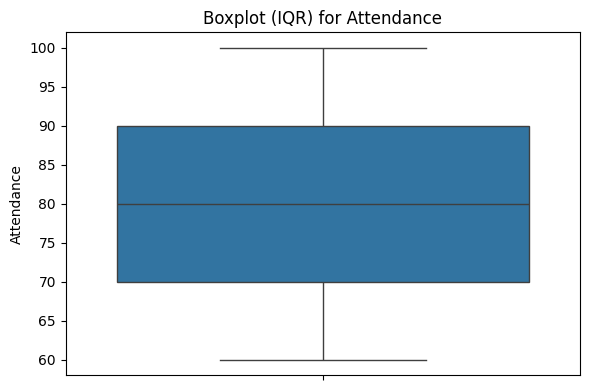

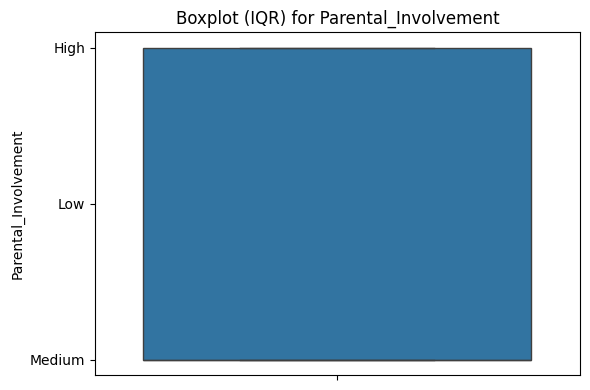

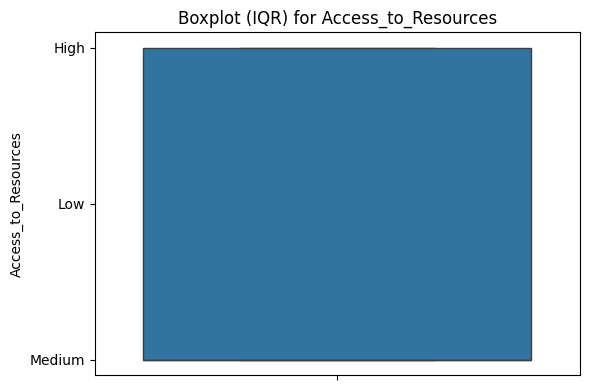

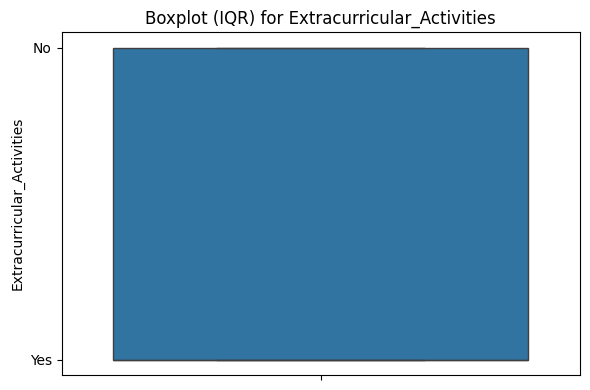

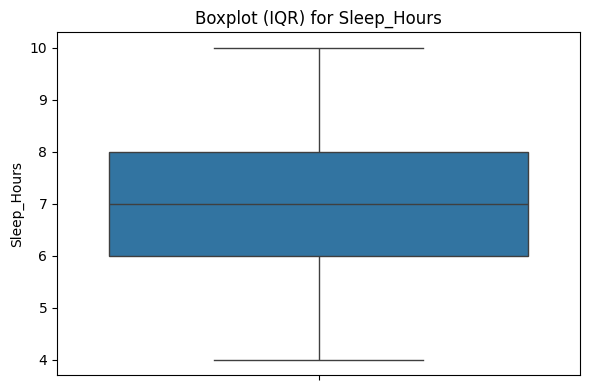

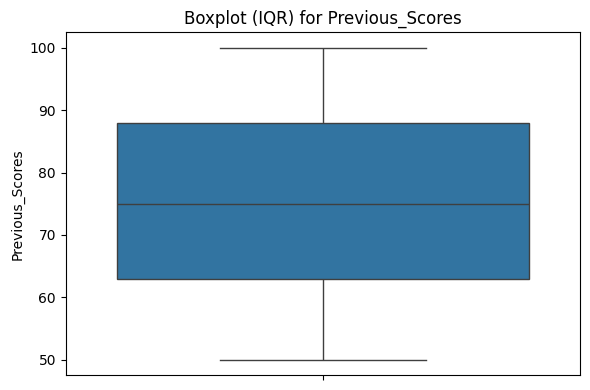

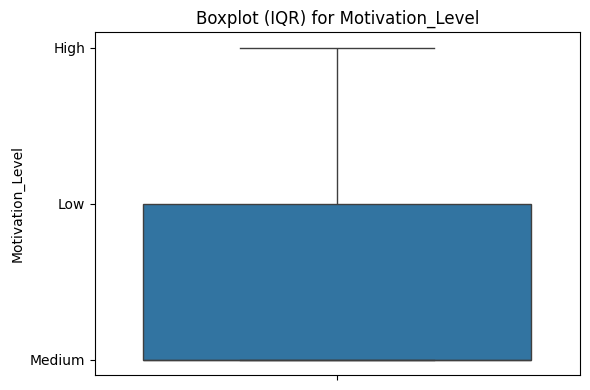

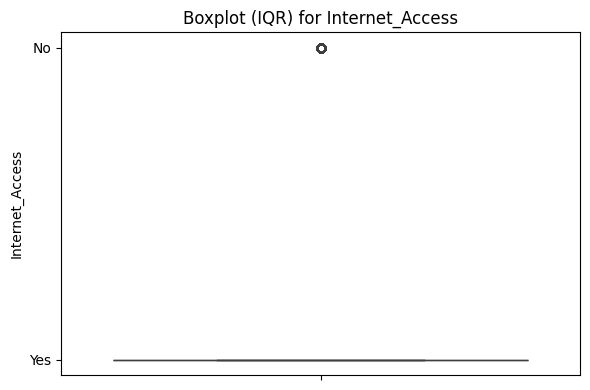

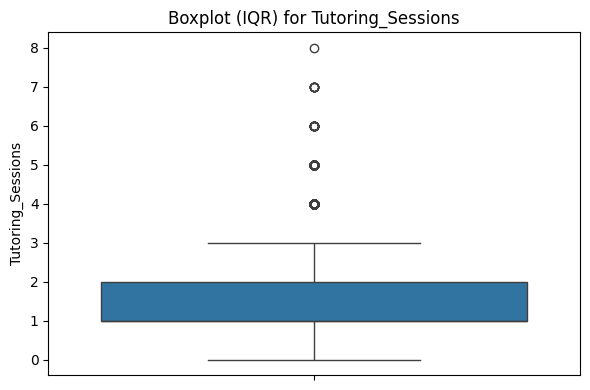

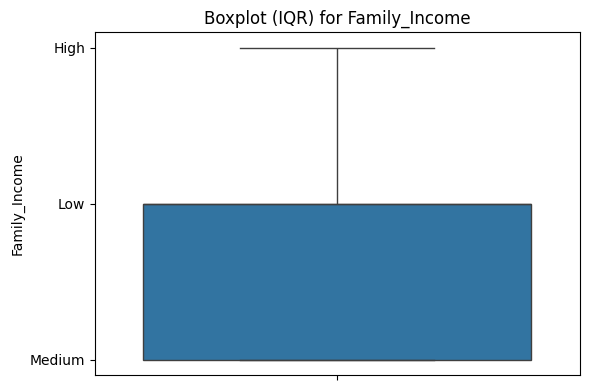

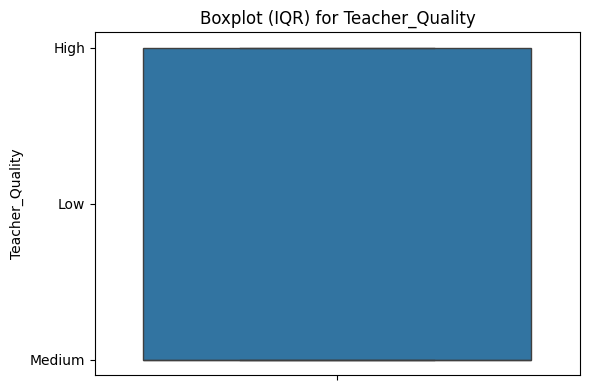

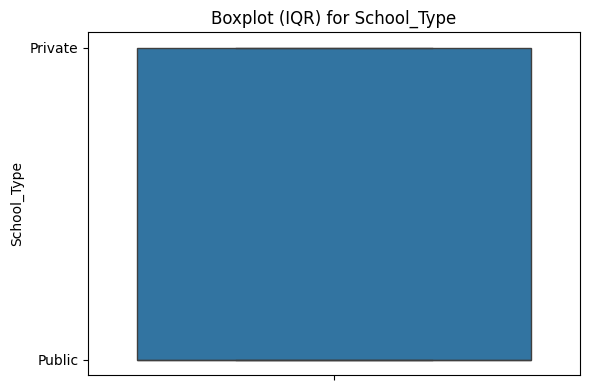

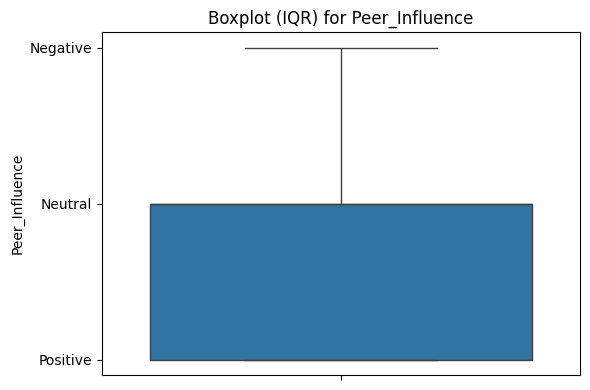

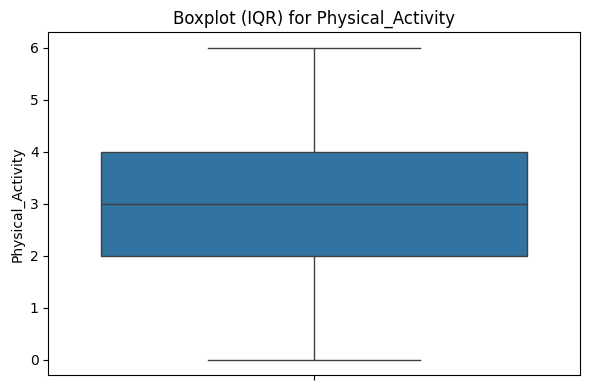

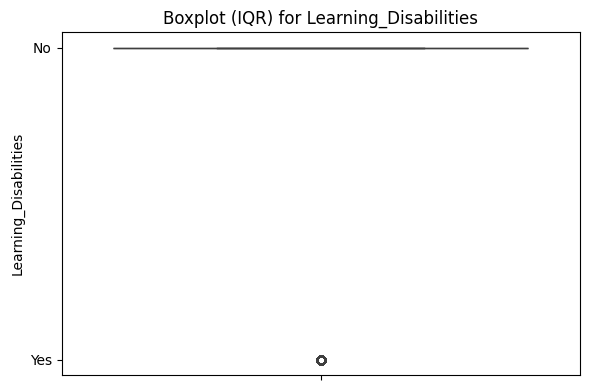

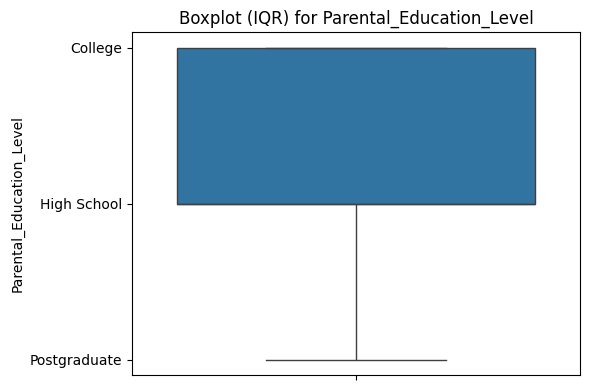

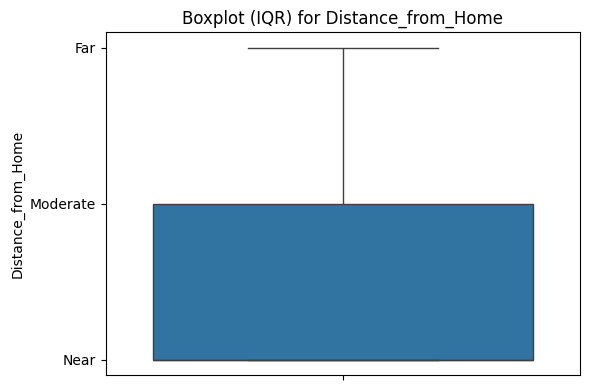

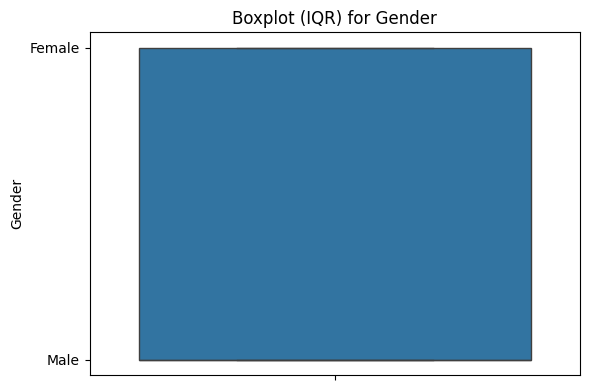

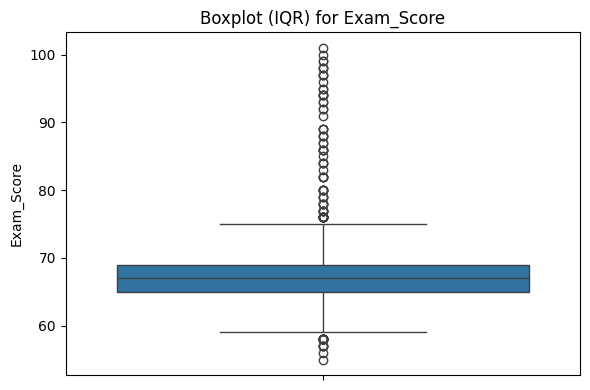

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in Originall_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=Originall_df[col])
    plt.title(f'Boxplot (IQR) for {col}')
    plt.tight_layout()
    plt.show()


In [44]:
clean_df = Originall_df.copy()

In [45]:
outlier_counts = {}

numeric_cols = clean_df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = clean_df[(clean_df[col] < lower) | (clean_df[col] > upper)]
    outlier_counts[col] = len(outliers)

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")


Hours_Studied: 40 outliers
Attendance: 0 outliers
Sleep_Hours: 0 outliers
Previous_Scores: 0 outliers
Tutoring_Sessions: 423 outliers
Physical_Activity: 0 outliers
Exam_Score: 103 outliers


##### Removing outliers


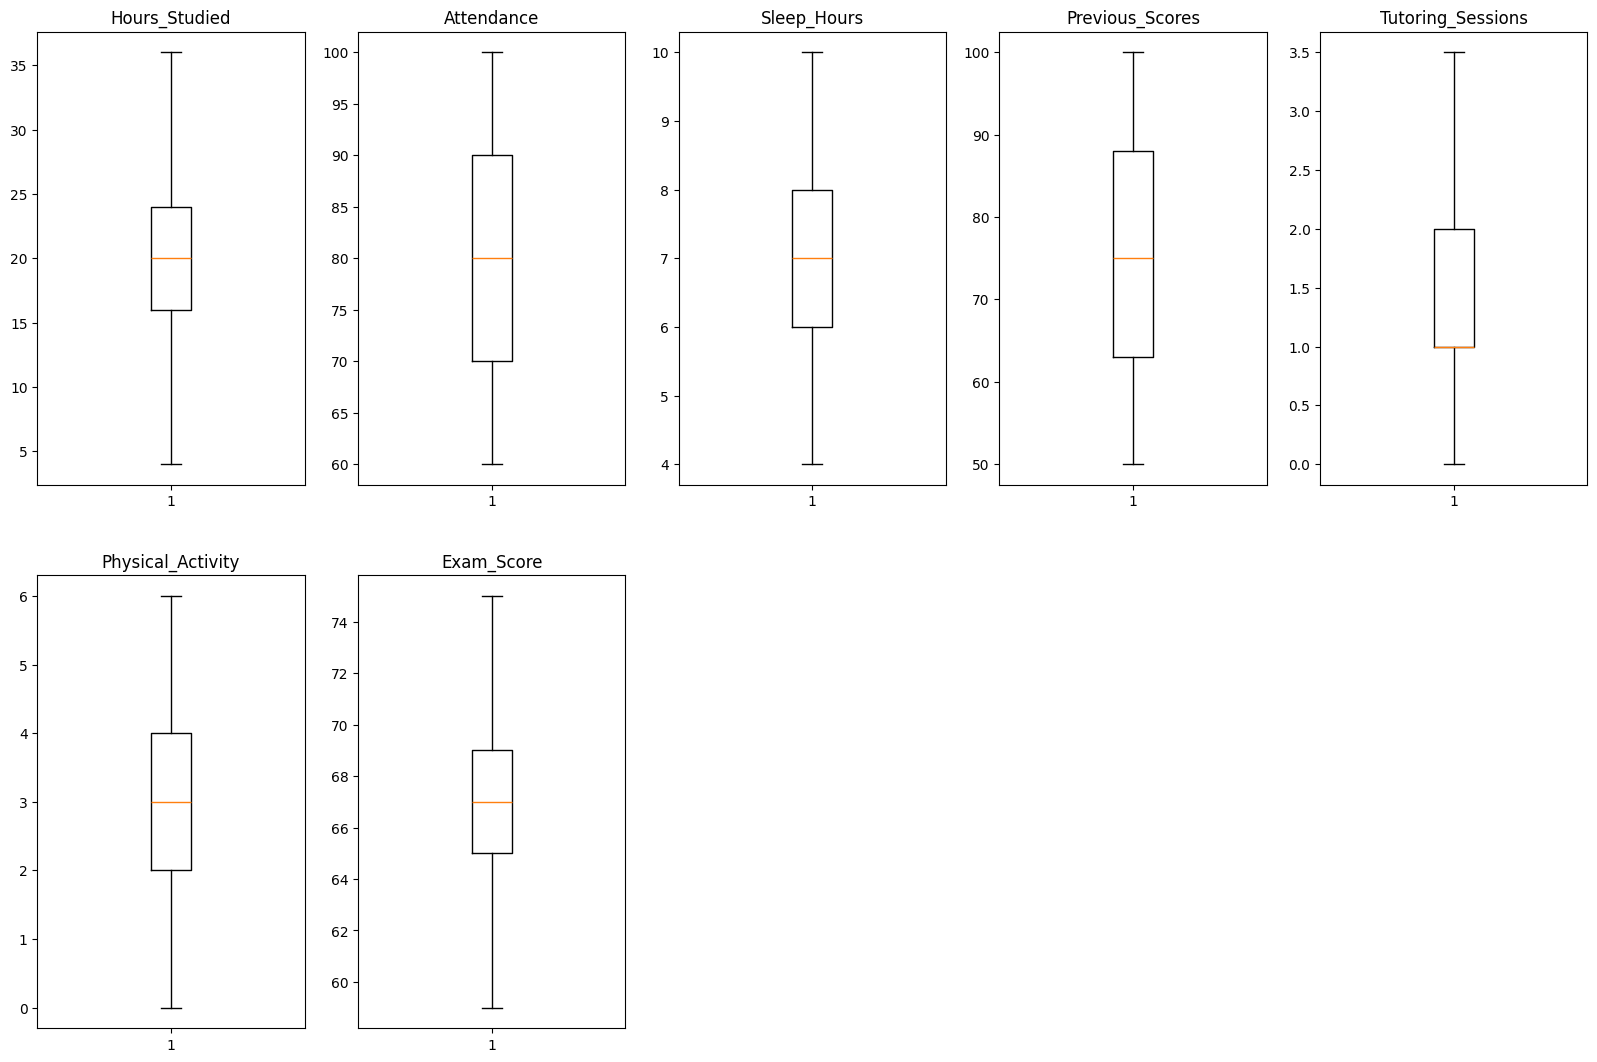

In [ ]:
numCol = clean_df.select_dtypes(['int64','float64']).columns

for col in numCol:
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    UP_FENCE = Q3 + 1.5 * IQR
    LO_FENCE = Q1 - 1.5 * IQR

    lowOutlier = clean_df[clean_df[col] < LO_FENCE][col].values
    upOutlier = clean_df[clean_df[col] > UP_FENCE][col].values

    clean_df[col] = clean_df[col].replace(lowOutlier, LO_FENCE)
    clean_df[col] = clean_df[col].replace(upOutlier, UP_FENCE)

# Create box plots
plt.figure(figsize=(20,20))
for i, col in enumerate(numCol):
    plt.subplot(3, 5, i+1)
    plt.boxplot(clean_df[col])
    plt.title(f"{col}")
plt.show()

In [49]:
outlier_counts = {}

numeric_cols = clean_df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = clean_df[(clean_df[col] < lower) | (clean_df[col] > upper)]
    outlier_counts[col] = len(outliers)

for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Hours_Studied: 0 outliers
Attendance: 0 outliers
Sleep_Hours: 0 outliers
Previous_Scores: 0 outliers
Tutoring_Sessions: 0 outliers
Physical_Activity: 0 outliers
Exam_Score: 0 outliers


# Feature Engineering

#### Encoding


In [50]:
Originall_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [51]:
encoded_df=clean_df.copy()
encoded_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0.0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2.0,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1.0,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3.0,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1.0,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3.0,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3.0,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2.0,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [52]:
import pandas as pd

# Manual mapping for ordinal variables (preserve natural order)
encoded_df['Parental_Involvement'] = encoded_df['Parental_Involvement'].map({'Low': 0, 'Medium': 1, 'High': 2})
encoded_df['Access_to_Resources'] = encoded_df['Access_to_Resources'].map({'Low': 0, 'Medium': 1, 'High': 2})
encoded_df['Motivation_Level'] = encoded_df['Motivation_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
encoded_df['Teacher_Quality'] = encoded_df['Teacher_Quality'].map({'Low': 0, 'Medium': 1, 'High': 2})
encoded_df['Peer_Influence'] = encoded_df['Peer_Influence'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
encoded_df['Family_Income'] = encoded_df['Family_Income'].map({'Low': 0, 'Medium': 1, 'High': 2})
encoded_df['Parental_Education_Level'] = encoded_df['Parental_Education_Level'].map({'High School': 0, 'College': 1, 'Postgraduate': 2})
encoded_df['Distance_from_Home'] = encoded_df['Distance_from_Home'].map({'Near': 0, 'Moderate': 1, 'Far': 2})

# One-hot encoding for nominal variables (no natural order)
nominal_cols = [
    'Gender',
    'School_Type', 
    'Internet_Access',
    'Learning_Disabilities',
    'Extracurricular_Activities'
]

encoded_df = pd.get_dummies(encoded_df, columns=nominal_cols, drop_first=True)

# Check the result
print("Columns after encoding:")
print(encoded_df.columns.tolist())
print("\nDataframe shape:", encoded_df.shape)

Columns after encoding:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Physical_Activity', 'Parental_Education_Level', 'Distance_from_Home', 'Exam_Score', 'Gender_Male', 'School_Type_Public', 'Internet_Access_Yes', 'Learning_Disabilities_Yes', 'Extracurricular_Activities_Yes']

Dataframe shape: (6378, 20)


In [53]:
encoded_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.973346,80.020853,7.034964,75.066165,1.436736,2.972719,67.139542
std,5.947598,11.550723,1.468033,14.400389,1.096792,1.028926,3.381262
min,4.000000,60.000000,4.000000,50.000000,0.000000,0.000000,59.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,36.000000,100.000000,10.000000,100.000000,3.500000,6.000000,75.000000


#### Normalization

In [54]:
normalized_df = encoded_df.copy()
scaler  = MinMaxScaler()
cols_to_normalize = ['Hours_Studied', 'Attendance' , 'Previous_Scores' ,'Physical_Activity','Tutoring_Sessions','Sleep_Hours']
normalized_df[cols_to_normalize] = scaler.fit_transform(normalized_df[cols_to_normalize])
normalized_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Internet_Access_Yes,Learning_Disabilities_Yes,Extracurricular_Activities_Yes
0,0.59375,0.600,0,2,0.500000,0.46,0,0.000000,0,1,2,0.500000,0,0,67,True,True,True,False,False
1,0.46875,0.100,0,1,0.666667,0.18,0,0.571429,1,1,0,0.666667,1,1,61,False,True,True,False,False
2,0.62500,0.950,1,1,0.500000,0.82,1,0.571429,1,1,1,0.666667,2,0,74,True,True,True,False,True
3,0.78125,0.725,0,1,0.666667,0.96,1,0.285714,1,1,0,0.666667,0,1,71,True,True,True,False,True
4,0.46875,0.800,1,1,0.333333,0.30,1,0.857143,1,2,1,0.666667,1,0,70,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.65625,0.225,2,1,0.500000,0.52,1,0.285714,2,1,2,0.333333,0,0,68,False,True,True,False,False
6603,0.59375,0.400,2,1,0.666667,0.62,1,0.857143,0,2,2,0.333333,0,0,69,False,True,True,False,False
6604,0.50000,0.750,1,0,0.333333,0.30,0,0.857143,0,1,0,0.333333,2,0,68,False,True,True,False,True
6605,0.18750,0.650,2,2,0.333333,0.82,2,0.571429,0,1,2,0.500000,0,2,68,False,False,True,False,True


In [55]:
normalized_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,0.499167,0.500521,0.505827,0.501323,0.410496,0.495453,67.139542
std,0.185862,0.288768,0.244672,0.288008,0.313369,0.171488,3.381262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000
25%,0.375000,0.250000,0.333333,0.260000,0.285714,0.333333,65.000000
50%,0.500000,0.500000,0.500000,0.500000,0.285714,0.500000,67.000000
75%,0.625000,0.750000,0.666667,0.760000,0.571429,0.666667,69.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000


In [56]:
normalized_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Internet_Access_Yes,Learning_Disabilities_Yes,Extracurricular_Activities_Yes
0,0.59375,0.600,0,2,0.500000,0.46,0,0.000000,0,1,2,0.500000,0,0,67,True,True,True,False,False
1,0.46875,0.100,0,1,0.666667,0.18,0,0.571429,1,1,0,0.666667,1,1,61,False,True,True,False,False
2,0.62500,0.950,1,1,0.500000,0.82,1,0.571429,1,1,1,0.666667,2,0,74,True,True,True,False,True
3,0.78125,0.725,0,1,0.666667,0.96,1,0.285714,1,1,0,0.666667,0,1,71,True,True,True,False,True
4,0.46875,0.800,1,1,0.333333,0.30,1,0.857143,1,2,1,0.666667,1,0,70,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.65625,0.225,2,1,0.500000,0.52,1,0.285714,2,1,2,0.333333,0,0,68,False,True,True,False,False
6603,0.59375,0.400,2,1,0.666667,0.62,1,0.857143,0,2,2,0.333333,0,0,69,False,True,True,False,False
6604,0.50000,0.750,1,0,0.333333,0.30,0,0.857143,0,1,0,0.333333,2,0,68,False,True,True,False,True
6605,0.18750,0.650,2,2,0.333333,0.82,2,0.571429,0,1,2,0.500000,0,2,68,False,False,True,False,True


# Train Test Split

In [63]:
X = normalized_df.drop('Exam_Score', axis=1)
y= normalized_df['Exam_Score']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {np.sqrt(mse)}')
print(f'R^2 Score: {r2*100:.2f}%')

Mean Squared Error: 0.890759366999226
R^2 Score: 93.15%


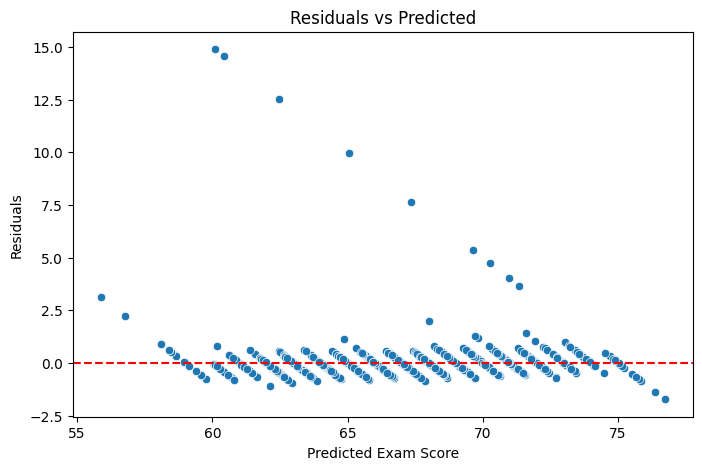

In [61]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2*100:.2f}%")
print(f"RMSE: {rmse:.2f}")


R² Score: 93.18%
RMSE: 0.89


# Bonus


In [73]:


# Prepare data
X = normalized_df.drop('Exam_Score', axis=1)
y = normalized_df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test polynomial degrees 1 to 5
for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train and predict
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_test_pred = model.predict(X_test_poly)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    
    print(f"Degree {degree}: R² Score: {r2} MAE: {mae} MSE: {mse} RMSE: {rmse}")

Degree 1: R² Score: 0.9318073321650622 MAE: 0.3623236227215245 MSE: 0.7970117315587093 RMSE: 0.8927551352743424
Degree 2: R² Score: 0.9272216922040833 MAE: 0.394954692075812 MSE: 0.8506070660960112 RMSE: 0.9222836147823571
Degree 3: R² Score: 0.8815483844108848 MAE: 0.6389141877758001 MSE: 1.3844204992114821 RMSE: 1.1766139975418795
Degree 4: R² Score: -0.19883658150427874 MAE: 2.591331277006245 MSE: 14.011577050973148 RMSE: 3.743204115590432
Degree 5: R² Score: 0.5616412234882684 MAE: 1.5130011312712868 MSE: 5.123382008711688 RMSE: 2.2634889018309075
